In [1]:
using LinearAlgebra
using CSV
using DataFrames
using Statistics
using JLD

In [2]:
dataDir = pwd()*"/script"

"/home/javier/Desktop/alpcah/environmental_data/data_test/script"

In [3]:
purple_air_sensors = 725
purpleSet = []
valid_purpleair = []
for i = 1:purple_air_sensors
    push!(purpleSet, Matrix(CSV.read(dataDir*"/data_purpleair_case1_"*string(i)*".csv", DataFrame))[:,1:2:3])
    if size(purpleSet[i])[1]==119
        push!(valid_purpleair, i)
    end
end

In [4]:
length(valid_purpleair)

339

In [134]:
airMatrix = Matrix(CSV.read(dataDir*"/data_airnow_case1.csv", DataFrame))

7448×4 Matrix{Any}:
 2021-02-09  01:00:00     7  12.0
 2021-02-09  02:00:00     7  10.0
 2021-02-09  03:00:00     7   6.0
 2021-02-09  04:00:00     7   6.0
 2021-02-09  05:00:00     7   5.0
 2021-02-09  06:00:00     7   6.0
 2021-02-09  07:00:00     7   8.0
 2021-02-09  08:00:00     7  10.0
 2021-02-09  09:00:00     7   7.0
 2021-02-09  10:00:00     7   9.0
 2021-02-09  11:00:00     7  11.0
 2021-02-09  12:00:00     7  11.0
 2021-02-09  13:00:00     7   8.0
 ⋮                                   
 2021-02-13  12:00:00  2003    missing
 2021-02-13  13:00:00  2003    missing
 2021-02-13  14:00:00  2003    missing
 2021-02-13  15:00:00  2003    missing
 2021-02-13  16:00:00  2003    missing
 2021-02-13  17:00:00  2003    missing
 2021-02-13  18:00:00  2003    missing
 2021-02-13  19:00:00  2003    missing
 2021-02-13  20:00:00  2003    missing
 2021-02-13  21:00:00  2003    missing
 2021-02-13  22:00:00  2003    missing
 2021-02-13  23:00:00  2003    missing

In [135]:
airSensors = unique(airMatrix[:,3])

34-element Vector{Any}:
    7
    1
 1002
    2
 5001
 5025
    4
 1004
    6
    3
 2510
 1003
    5
    ⋮
   11
 2010
 2009
   20
  500
   15
 2016
   13
 1007
 3002
   31
 2003

In [136]:
airSet = []
count = 1
valid_airnow = []
for i in airSensors
    push!(airSet, airMatrix[airMatrix[:,3] .== i,:] )
    if size(airSet[count])[1] >= 119
        push!(valid_airnow,count)
    end
    count = count + 1
end

In [8]:
#valid_airnow

In [9]:
sum([1 2 2 4 5] .== 2)

2

In [10]:
purpleMatrix = zeros(119, length(valid_purpleair))
count = 1
index = []
for i in valid_purpleair
    if sum(purpleSet[i][:,2] .> 500) == 0
        purpleMatrix[:,count] = purpleSet[i][:,2]
        push!(index,count)
        count = count + 1
    end
end
purpleMatrix = purpleMatrix[:,index];

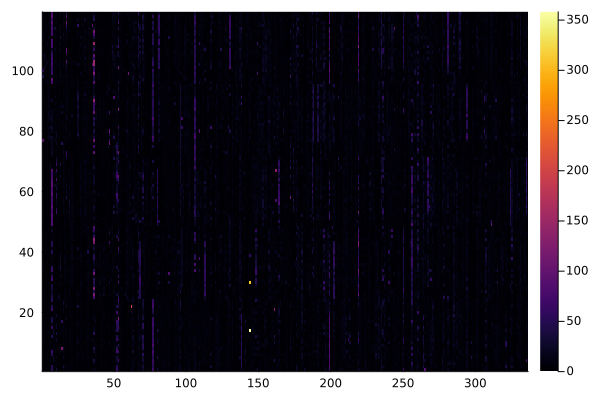

In [12]:
using Plots
heatmap(purpleMatrix)

In [137]:
airMatrix = zeros(119, length(valid_airnow))
count = 1
for i in valid_airnow
    airMatrix[:,count] = coalesce.(airSet[i][:,4], 0)[1:119]
    count = count + 1
end

In [14]:
# airLabels = 1*ones(Int,size(airMatrix)[2]);
# purpleLabels = 1*ones(Int,size(purpleMatrix)[2]);

In [15]:
using PyCall
@pyimport pickle

function mypickle(filename, obj)
    out = open(filename,"w")
    pickle.dump(obj, out)
    close(out)
 end

function myunpickle(filename)
    r = nothing
    @pywith pybuiltin("open")(filename,"rb") as f begin
        r = pickle.load(f)
    end
    return r
end

myunpickle (generic function with 1 method)

In [16]:
data = myunpickle("../airData.pickle")[2];
# data[1] .= max.(data[1],0)
# data[2] .= max.(data[2],0)
# # data[2] .= min.(data[2],250) ### cap maximum reading
# data[1] .-= mean(data[1],dims=2)
# data[2] .-= mean(data[2],dims=2);

In [17]:
using JLD
airMatrix = Float64.(load("script2/airMatrix.jld", "airMatrix"))[1:119,:]

119×55 Matrix{Float64}:
  7.7  9.4  11.3  10.3  13.1  10.8  …  4.6  20.2   2.6  31.6  38.7   2.6
  6.2  7.7  12.1  10.3  11.5   9.4     3.8  24.0   3.8  29.2  41.2   4.3
  5.5  5.8  11.0  10.1  10.3   8.6     2.9  25.9   2.9  29.2  44.4   4.6
  6.2  7.4  10.1  10.6  10.6   9.8     2.4  28.3   1.9  31.6  47.7   3.4
  9.1  8.6  10.6  10.8  12.1   9.4     2.6  35.5   2.4  33.0  48.9   2.2
 10.1  8.4  11.0  10.3  12.1  11.3  …  2.9  42.0   4.8  34.0  54.6   1.4
 10.1  7.7   9.6   9.1  12.0  12.6     2.4  42.0   4.3  32.1  55.0   8.6
 10.1  8.9   9.8  10.1  13.1  12.1     4.3  39.2   3.6  32.1  53.0  13.5
  9.1  8.4   9.4   8.9  12.0  11.5     4.6  35.5   4.8  31.6  50.9   9.1
  7.9  6.2   9.4   6.2   9.6   9.4     3.4  34.0   5.5  30.2  50.1  14.5
  7.4  6.0   9.1   5.5   8.6  10.6  …  1.7  32.1   4.8  29.7  51.3  14.0
  6.7  7.4   8.2   5.3   7.9   9.8     1.2  34.4   3.4  29.2  47.7  13.1
  4.8  7.2   7.7   6.0   9.4   9.4     2.2  35.5   3.6  31.6  47.7  11.5
  ⋮                        

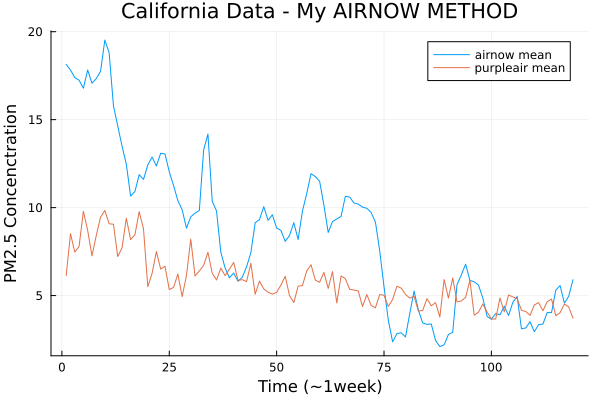

In [144]:
using Plots
using Random
plot(mean(airMatrix, dims=2), label="airnow mean")
plot!(mean(purpleMatrix2, dims=2), label="purpleair mean")
plot!(title="California Data - My AIRNOW METHOD", xlabel="Time (~1week)", ylabel="PM2.5 Concenctration")

In [52]:
using NearestNeighbors
kdtree = KDTree(airMatrix)
knn(kdtree, mean(airMatrix, dims=2), 25, true)[1][1]
#plot( mean(airMatrix[:,idxs[1]], dims=2) )

25-element Vector{Int64}:
 33
 34
 41
 16
 28
 21
 12
 31
 27
  5
 14
 18
 20
 22
  6
  9
 30
 29
 19
 17
  8
  2
 37
 32
 13

In [115]:
kdtree = KDTree(purpleMatrix)
purpleMatrix2 = []
for i=1:size(airMatrix)[2]
    idxs = knn(kdtree, airMatrix[:,i], 5, true)[1]
    push!(purpleMatrix2, purpleMatrix[:,idxs])
end
purpleMatrix2 = reduce(hcat,purpleMatrix2)
purpleMatrix2 = reduce(hcat, unique(eachcol(purpleMatrix2))) 

119×52 Matrix{Float64}:
 3.333    3.7165  2.403   6.483   4.982   …  0.906    6.1215  14.5915  2.207
 5.713   10.9675  2.456   5.0405  4.245      2.6455   3.192   11.695   3.766
 3.1155   7.8435  3.337   5.662   4.7695     2.1505   3.6595   3.274   3.411
 5.4975   5.9725  3.672   5.46    5.003      2.813   10.104   25.7335  3.148
 5.058   12.2165  6.0395  2.6745  4.3855     1.408    2.1405  35.6815  2.897
 5.0605   3.6     3.2915  4.149   3.224   …  1.574    5.338    2.3875  3.0605
 3.535    7.88    4.681   7.0505  4.766      0.2645   0.903    2.8105  1.8495
 3.898    4.725   4.4765  1.53    4.9925     2.1785   4.3675   9.1685  1.2965
 8.0805   5.7355  3.3545  4.567   3.3675     1.645    2.9055  31.5105  1.278
 4.911    3.679   2.28    7.871   5.11       1.8305   0.164    2.317   2.8565
 4.7195   5.0025  0.892   1.486   4.3455  …  5.0515   2.3245  14.8975  3.478
 7.574    5.8765  2.9725  3.1335  2.8015     2.4745   2.015   22.337   2.6345
 4.746    5.731   4.4805  5.1095  3.2845     1.

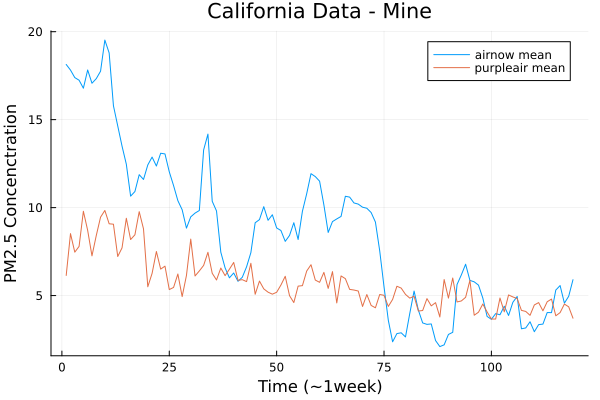

In [145]:
using Plots
using Random
plot(mean(airMatrix, dims=2), label="airnow mean")
plot!(mean(purpleMatrix2, dims=2), label="purpleair mean")
plot!(title="California Data - Mine", xlabel="Time (~1week)", ylabel="PM2.5 Concenctration")

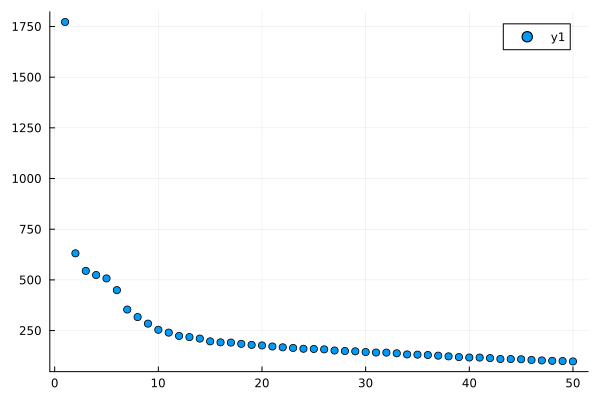

In [146]:
scatter(svdvals(hcat(airMatrix,purpleMatrix))[1:50])

In [148]:
airMatrix

119×33 Matrix{Float64}:
 12.0  18.0  15.0   7.7  30.0  32.1  …  20.0  36.0  11.0  6.0  2.3  14.0
 10.0   9.0  16.0   2.6  28.0  32.8     22.0  33.0   7.0  6.0  2.5   9.0
  6.0  16.0  13.0  12.0  28.0  30.2     26.0  39.0  12.0  4.0  1.0  27.0
  6.0   9.0  14.0  10.0  29.0  36.4     20.0  37.0   9.0  2.0  4.0  21.0
  5.0   6.0  13.0  15.0  36.0  37.6     17.0  44.0   9.0  4.0  2.0   7.0
  6.0  19.0  10.0  10.0  34.0  39.1  …  22.0  48.0   5.0  4.0  1.0  17.0
  8.0  16.0  12.0  12.0  31.0  41.6     19.0  50.0   5.0  3.0  4.0  10.0
 10.0  13.0  15.0   9.0  35.0  40.9     18.0  48.0   9.0  5.0  2.0   7.0
  7.0  12.0  24.0   7.0  36.0  38.7     21.0  41.0   9.0  4.0  2.0  11.0
  9.0  14.0  48.0   6.0  31.0  34.2     20.0  44.0   8.0  3.0  3.0   9.0
 11.0  10.0  42.0   8.0  35.0  33.2  …  20.0  39.0   7.0  3.0  2.0  17.0
 11.0  11.0  29.0   8.0  43.0  31.2     19.0  40.0   7.0  3.0  2.0  13.0
  8.0  13.0  33.0   6.0  44.0  23.9     19.0  30.0   7.0  0.0  3.0   0.0
  ⋮                        

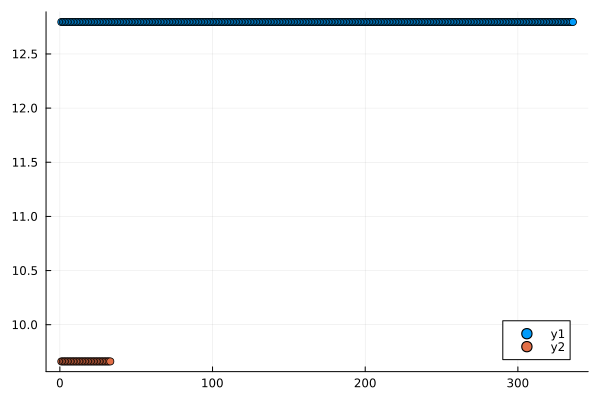

In [149]:
include("/home/javier/Desktop/alpcah/alpcahFamily.jl")
U = LR_ALPCAH_GROUPED(hcat(airMatrix,purpleMatrix),30; alpcahIter= 1000, goodpts=33)
v = groupedVarianceUpdate(hcat(airMatrix,purpleMatrix), U*U'*hcat(airMatrix,purpleMatrix), 33)
scatter(v[34:end])
scatter!(v[1:33])

In [129]:
using JLD
list = []
push!(list, airMatrix)
push!(list, purpleMatrix)
save("newairdata.jld","data",list)

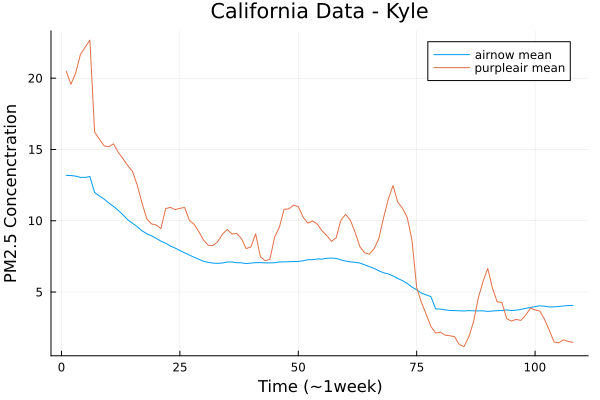

In [111]:
using Plots
plot(mean(data[1], dims=2), label="airnow mean")
plot!(mean(data[2], dims=2), label="purpleair mean")
plot!(title="California Data - Kyle", xlabel="Time (~1week)", ylabel="PM2.5 Concenctration")

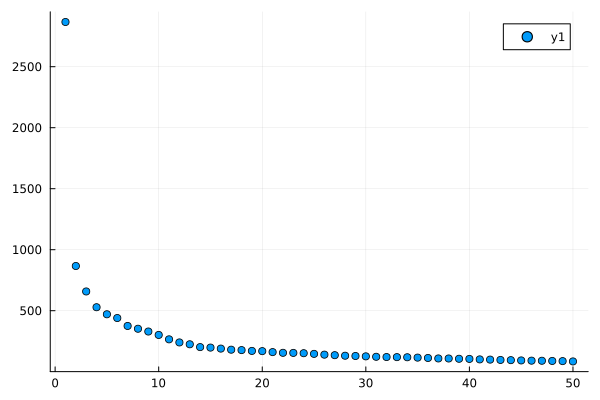

In [24]:
scatter(svdvals(hcat(data[1],data[2]))[1:50])

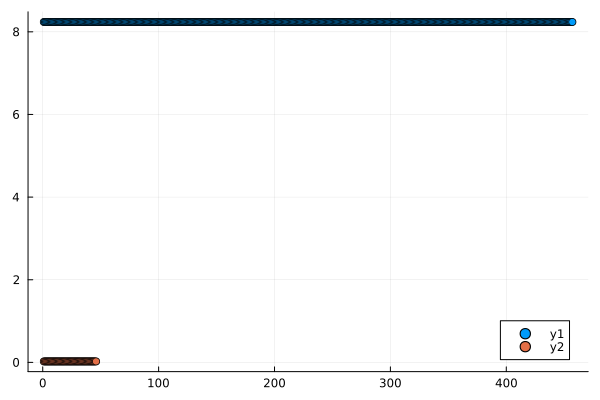

In [25]:
U = LR_ALPCAH_GROUPED(hcat(data[1],data[2]),30; alpcahIter= 1000, goodpts=46)
v = groupedVarianceUpdate(hcat(data[1],data[2]), U*U'*hcat(data[1],data[2]), 46)
scatter(v[47:end])
scatter!(v[1:46])

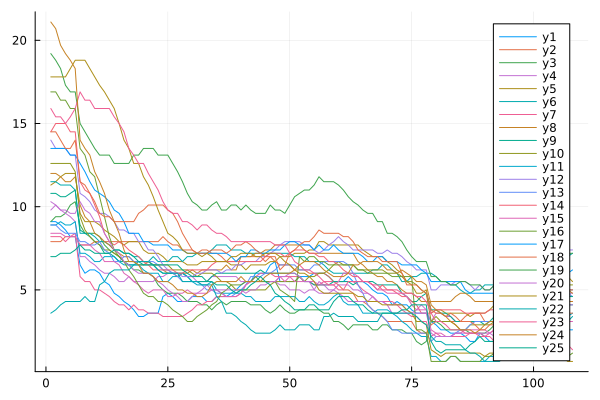

In [30]:
plot(data[1][:,1:25])

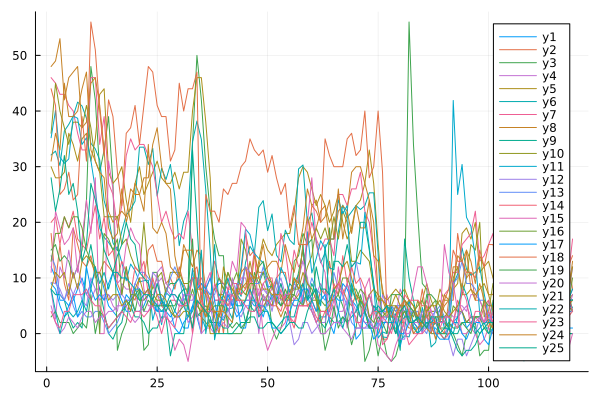

In [150]:
plot(airMatrix[:,1:25])

In [106]:
using NPZ
test = npzread("airTest.npy");

using Plots
using Impute
function nantomissing(value)
    if isnan(value)==true
        return missing
    else
        return value
    end
end
test = nantomissing.(test)

120×40 Matrix{Union{Missing, Float64}}:
 1.8       2.3  2.7  2.5  3.1  2.6  …  1.4       5.4  1.1       7.6  0.6
 1.5       1.8  2.9  2.5  2.8  2.3     1.7       6.2  0.9       7.0  1.0
 1.3       1.4  2.6  2.4  2.5  2.1     1.6       6.8  0.7       7.0  1.1
 1.5       1.8  2.4  2.5  2.5  2.4     1.7       7.7  0.6       7.6  0.8
 2.2       2.1  2.5  2.6  2.9  2.3     2.6       7.6  0.6       7.9  0.5
 2.4       2.0  2.6  2.5  2.9  2.7  …  2.6       8.8  0.7       8.2  0.3
 2.4       1.8  2.3  2.2  2.9  3.0     2.2       9.1  0.6       7.7  2.1
 2.4       2.1  2.4  2.4  3.1  2.9     1.3       8.4  1.0       7.7  3.2
 2.2       2.0  2.3  2.1  2.9  2.8     0.7       7.5  1.1       7.6  2.2
 1.9       1.5  2.3  1.5  2.3  2.3     0.9       6.2  0.8       7.2  3.5
 1.8       1.4  2.2  1.3  2.1  2.5  …  0.7       6.2  0.4       7.1  3.4
 1.6       1.8  2.0  1.3  1.9  2.4     0.5       7.1  0.3       7.0  3.1
 1.2       1.7  1.8  1.4  2.3  2.3     0.7       6.6  0.5       7.6  2.8
 ⋮         

In [107]:
test = Impute.interp(test; dims=2) |> Impute.locf(;dims=2) |> Impute.nocb(;dims=2)

120×40 Matrix{Union{Missing, Float64}}:
 1.8  2.3  2.7  2.5  3.1  2.6  2.4   3.0  …  4.6  1.4   5.4  1.1   7.6  0.6
 1.5  1.8  2.9  2.5  2.8  2.3  2.0   2.8     4.5  1.7   6.2  0.9   7.0  1.0
 1.3  1.4  2.6  2.4  2.5  2.1  2.0   2.6     5.3  1.6   6.8  0.7   7.0  1.1
 1.5  1.8  2.4  2.5  2.5  2.4  1.8   2.5     6.4  1.7   7.7  0.6   7.6  0.8
 2.2  2.1  2.5  2.6  2.9  2.3  2.1   2.5     7.2  2.6   7.6  0.6   7.9  0.5
 2.4  2.0  2.6  2.5  2.9  2.7  2.1   2.4  …  7.5  2.6   8.8  0.7   8.2  0.3
 2.4  1.8  2.3  2.2  2.9  3.0  2.5   2.5     7.8  2.2   9.1  0.6   7.7  2.1
 2.4  2.1  2.4  2.4  3.1  2.9  2.2   2.5     8.3  1.3   8.4  1.0   7.7  3.2
 2.2  2.0  2.3  2.1  2.9  2.8  1.6   2.1     8.4  0.7   7.5  1.1   7.6  2.2
 1.9  1.5  2.3  1.5  2.3  2.3  1.0   1.7     9.0  0.9   6.2  0.8   7.2  3.5
 1.8  1.4  2.2  1.3  2.1  2.5  0.6   1.7  …  8.3  0.7   6.2  0.4   7.1  3.4
 1.6  1.8  2.0  1.3  1.9  2.4  0.8   1.4     7.8  0.5   7.1  0.3   7.0  3.1
 1.2  1.7  1.8  1.4  2.3  2.3  0.9   1.2     7.7

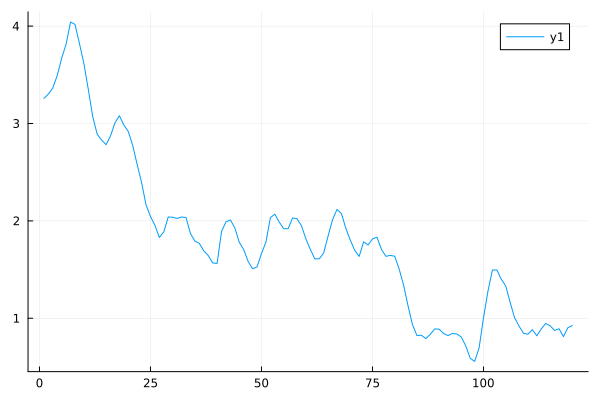

In [108]:
plot(mean(test,dims=2))

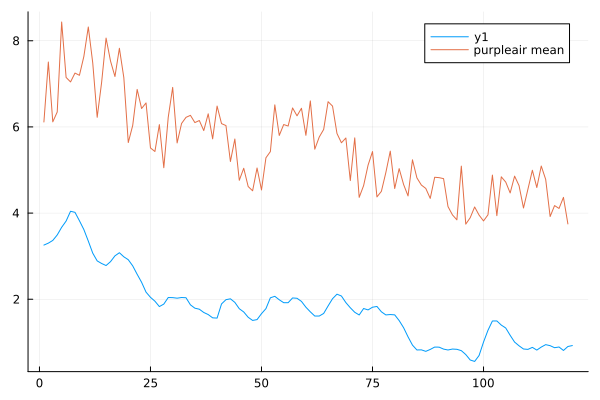

In [110]:
using Plots
plot(mean(test,dims=2))
plot!(mean(purpleMatrix2, dims=2), label="purpleair mean")

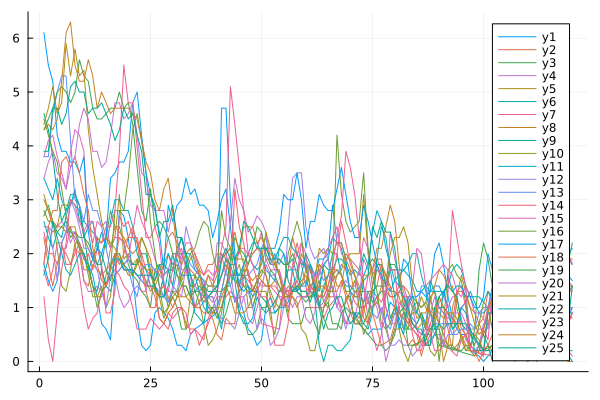

In [132]:
plot(test[:,1:25])